In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
import open_clip
import json
import copy

/home/csgrad/byalavar/miniconda3/envs/xai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!python -m pip install git+https://github.com/garrettj403/SciencePlots.git

  Cloning https://github.com/garrettj403/SciencePlots.git to /tmp/pip-req-build-1qgi11jb
  Running command git clone --filter=blob:none --quiet https://github.com/garrettj403/SciencePlots.git /tmp/pip-req-build-1qgi11jb
  Resolved https://github.com/garrettj403/SciencePlots.git to commit 0064c84dfce1b9b420783331fb674d310e921e36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SciencePlots: filename=SciencePlots-2.1.1-py3-none-any.whl size=16325 sha256=4519fb759809ded499e940f91b475d47da70b44bc130f0b8a66db8ac4999aa23
  Stored in directory: /tmp/pip-ephem-wheel-cache-3t02mn5z/wheels/c1/9e/7b/cb52cb6c1fb30e40397093326b165c8868a295f1cfdd47ef61
Successfully built SciencePlots
  Attempting uninstall: SciencePlots
    Found existing installation: SciencePlots 1.0.1
    Uninstalling SciencePlots-1.0.1:
      Successfully uninstalled SciencePlots-1.

In [5]:
import matplotlib
print(matplotlib.get_configdir())

/home/csgrad/byalavar/.config/matplotlib


In [128]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','no-latex'])

In [10]:
!pip install latex

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 5.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7589 sha256=17d73cbdff1e7ecd379bcd7acddf92ac3bca124195a0e5938d9d03834742594e
  Stored in directory: /home/csgrad/byalavar/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=5333d105cf374eb28da96611037977886cdb85bca26dc1ed75b81f79117c395e
  Stored in directory: /home/csgrad/byalavar/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=7564bd1187961f596a4446cab420dd6cb5870be31913e9dbb303a5c1d8741f8b
  Stored in directory: /home/csgrad/byalavar/.cache/

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['CLIP Base', 'Full FT', 'a', 'a1']

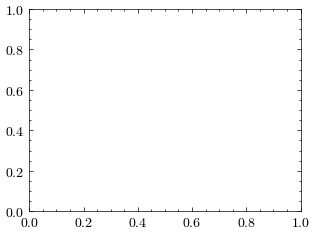

In [25]:
import matplotlib.pyplot as plt
import numpy as np

N = 45
AvgFaceAcc = [75.28, 94.8, 76.72,89.48]
cifarAcc = [96.91,12.59,36.16,94.27]
c = ["CLIP Base","Full FT","a","a1"]
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c)

# Produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)



plt.show()


/tmp/ipykernel_3809317/2517419252.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend1.legendHandles.extend(custom_handles)


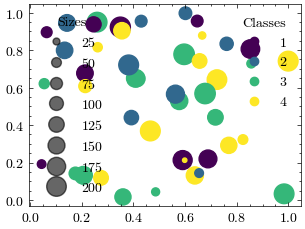

In [22]:
import matplotlib.pyplot as plt
import numpy as np

N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# Produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

# Custom legend
custom_labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4']
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='C{}'.format(i), label=label) for i, label in enumerate(custom_labels)]
legend1.legendHandles.extend(custom_handles)

# Produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower left", title="Sizes")

plt.show()

In [3]:
a = torch.load("/home/csgrad/byalavar/XAI/AdaFace/weightEnsembled.ckpt")

In [7]:
a.keys()

odict_keys(['positional_embedding', 'text_projection', 'logit_scale', 'visual.class_embedding', 'visual.positional_embedding', 'visual.proj', 'visual.conv1.weight', 'visual.ln_pre.weight', 'visual.ln_pre.bias', 'visual.transformer.resblocks.0.ln_1.weight', 'visual.transformer.resblocks.0.ln_1.bias', 'visual.transformer.resblocks.0.attn.in_proj_weight', 'visual.transformer.resblocks.0.attn.in_proj_bias', 'visual.transformer.resblocks.0.attn.out_proj.weight', 'visual.transformer.resblocks.0.attn.out_proj.bias', 'visual.transformer.resblocks.0.ln_2.weight', 'visual.transformer.resblocks.0.ln_2.bias', 'visual.transformer.resblocks.0.mlp.c_fc.weight', 'visual.transformer.resblocks.0.mlp.c_fc.bias', 'visual.transformer.resblocks.0.mlp.c_proj.weight', 'visual.transformer.resblocks.0.mlp.c_proj.bias', 'visual.transformer.resblocks.1.ln_1.weight', 'visual.transformer.resblocks.1.ln_1.bias', 'visual.transformer.resblocks.1.attn.in_proj_weight', 'visual.transformer.resblocks.1.attn.in_proj_bias',

In [2]:
ckpt = torch.load("/data/bharat/XAI/best4/epoch=16-step=16303.ckpt")



In [5]:
ckpt['state_dict'].keys()

odict_keys(['logit_scale', 'model.positional_embedding', 'model.text_projection', 'model.logit_scale', 'model.visual.class_embedding', 'model.visual.positional_embedding', 'model.visual.proj', 'model.visual.conv1.weight', 'model.visual.ln_pre.weight', 'model.visual.ln_pre.bias', 'model.visual.transformer.resblocks.0.ln_1.weight', 'model.visual.transformer.resblocks.0.ln_1.bias', 'model.visual.transformer.resblocks.0.attn.in_proj_weight', 'model.visual.transformer.resblocks.0.attn.in_proj_bias', 'model.visual.transformer.resblocks.0.attn.out_proj.weight', 'model.visual.transformer.resblocks.0.attn.out_proj.bias', 'model.visual.transformer.resblocks.0.ln_2.weight', 'model.visual.transformer.resblocks.0.ln_2.bias', 'model.visual.transformer.resblocks.0.mlp.c_fc.weight', 'model.visual.transformer.resblocks.0.mlp.c_fc.bias', 'model.visual.transformer.resblocks.0.mlp.c_proj.weight', 'model.visual.transformer.resblocks.0.mlp.c_proj.bias', 'model.visual.transformer.resblocks.1.ln_1.weight', 'm

In [7]:
ckpt['state_dict']['fcImage.2.weight'].shape

torch.Size([768, 384])

In [8]:
fcImage = nn.Sequential(
            nn.Linear(768, 768 // 2, bias=False),
            nn.ReLU(inplace=True),
        
            nn.Linear(768 // 2, 768, bias=False),
            nn.ReLU(inplace=True)
         )

In [9]:
for i in fcImage.parameters():
    print(i)

Parameter containing:
tensor([[-0.0032,  0.0353,  0.0021,  ...,  0.0147, -0.0205, -0.0197],
        [ 0.0258,  0.0156, -0.0092,  ...,  0.0349,  0.0046,  0.0241],
        [ 0.0247,  0.0002,  0.0088,  ..., -0.0123, -0.0356, -0.0082],
        ...,
        [-0.0225,  0.0100,  0.0259,  ..., -0.0208, -0.0183, -0.0298],
        [ 0.0271,  0.0165, -0.0150,  ..., -0.0237,  0.0140, -0.0327],
        [ 0.0163, -0.0320, -0.0290,  ...,  0.0095,  0.0271,  0.0011]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0151, -0.0123, -0.0490,  ...,  0.0317, -0.0154, -0.0076],
        [-0.0064,  0.0003, -0.0398,  ..., -0.0292, -0.0259,  0.0058],
        [ 0.0283,  0.0118,  0.0385,  ..., -0.0380,  0.0311,  0.0320],
        ...,
        [ 0.0178, -0.0082, -0.0181,  ...,  0.0293,  0.0402, -0.0394],
        [-0.0509,  0.0508,  0.0361,  ..., -0.0459,  0.0111, -0.0101],
        [ 0.0357, -0.0059, -0.0356,  ..., -0.0219,  0.0106, -0.0246]],
       requires_grad=True)


In [14]:
fcImage[0].weight = nn.Parameter(ckpt['state_dict']['fcText.0.weight'])
fcImage[2].weight = nn.Parameter(ckpt['state_dict']['fcImage.2.weight'])

In [17]:
ckpt['state_dict']['fcText.2.weight']

tensor([[ 0.0375,  0.0300,  0.0209,  ...,  0.0497, -0.0163,  0.0436],
        [ 0.0434,  0.0035, -0.0434,  ..., -0.0341, -0.0197, -0.0071],
        [ 0.0069, -0.0403,  0.0411,  ...,  0.0135, -0.0291,  0.0480],
        ...,
        [ 0.0221, -0.0135, -0.0381,  ...,  0.0242,  0.0179,  0.0260],
        [-0.0181, -0.0262,  0.0162,  ..., -0.0203, -0.0291,  0.0238],
        [ 0.0082,  0.0389, -0.0023,  ..., -0.0245,  0.0472,  0.0414]],
       device='cuda:0')

: 

In [15]:
for i in fcImage.parameters():
    print(i)

Parameter containing:
tensor([[-8.8606e-03, -2.2415e-02,  1.6651e-02,  ..., -4.2914e-03,
         -1.0597e-03,  1.6648e-02],
        [ 2.6313e-02, -3.2124e-02,  1.1221e-02,  ...,  1.0430e-02,
          1.3485e-02,  1.2527e-02],
        [ 9.6171e-03, -1.2126e-02,  7.4233e-03,  ..., -1.1782e-04,
          2.6024e-03, -7.0624e-03],
        ...,
        [ 2.9280e-03,  3.6810e-03,  5.8318e-03,  ..., -4.1695e-03,
          2.7089e-03, -3.0047e-03],
        [ 8.3598e-10, -5.4673e-09,  3.6193e-09,  ..., -6.1838e-09,
          5.1067e-09,  9.1234e-09],
        [-7.8282e-09,  3.2063e-09, -2.5626e-09,  ..., -1.1801e-08,
         -9.2371e-09,  6.5544e-10]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-2.7874e-04, -2.7970e-04, -2.7392e-04,  ..., -8.6570e-05,
         -1.8303e-08,  1.6315e-08],
        [-9.2131e-09, -1.5697e-08,  1.0416e-08,  ...,  1.0776e-08,
         -9.9135e-09,  1.3649e-08],
        [-2.1053e-08, -1.2499e-08, -5.1489e-08,  ..., -2.2493e-08,
          5.12

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:laion/CLIP-ViT-L-14-laion2B-s32B-b82K')
model.to(device)
tokenizer = open_clip.get_tokenizer('hf-hub:laion/CLIP-ViT-L-14-laion2B-s32B-b82K')
textTokens = torch.load("/home/csgrad/byalavar/XAI/AdaFace/conceptTokensExp2.pt")

In [2]:
import torch
import torch.nn.functional as F
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer 

model, preprocess = create_model_from_pretrained('hf-hub:apple/DFN5B-CLIP-ViT-H-14-384')
tokenizer = get_tokenizer('ViT-H-14')

# image = Image.open(urlopen(
#     'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
# ))
# image = preprocess(image).unsqueeze(0)

# labels_list = ["a dog", "a cat", "a donut", "a beignet"]
# text = tokenizer(labels_list, context_length=model.context_length)

# with torch.no_grad(), torch.cuda.amp.autocast():
#     image_features = model.encode_image(image)
#     text_features = model.encode_text(text)
#     image_features = F.normalize(image_features, dim=-1)
#     text_features = F.normalize(text_features, dim=-1)

#     text_probs = torch.sigmoid(image_features @ text_features.T * model.logit_scale.exp() + model.logit_bias)

# zipped_list = list(zip(labels_list, [round(p.item(), 3) for p in text_probs[0]]))
# print("Label probabilities: ", zipped_list)


open_clip_pytorch_model.bin: 100%|██████████| 3.95G/3.95G [00:44<00:00, 88.4MB/s]
open_clip_config.json: 100%|██████████| 735/735 [00:00<00:00, 1.70MB/s]


In [5]:
torch.save(model,"model.pt")

In [ ]:
conceptsUpdated = ["Face of a Young Person","Face of a middle aged person","Face of a Old Person",
"Face of a Male","Face of a Female",
"Face color: Pale White","Face color: White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Dark Brown","Face color: Black",
"Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Pear","Face shape: Oblong",
"Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower",
"Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide", 
"Hair Length: Chin Length", "Hair Length: Neck Length", "Hair Length: Shoulder Length", "Hair Length: Collarbone Length","Hair Length: Long Length",
"Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown",
"Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald",
"Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None",
"Forehead height: Long","Forehead height: Normal", "Forehead height: Short",
"Forehead width: Wide","Forehead width: Normal", "Forehead width: Narrow",
"Brow ridges are Prominent", "Brow ridges are Subtle",
"Right eyebrow shape is Arch", "Right eyebrow shape is Straight", "Right eyebrow shape is Curved", 
"Left eyebrow shape is Arch", "Left eyebrow shape is Straight", "Left eyebrow shape is Curved",
"Left and Right Eyebrows: Symmetrical", "Left and Right Eyebrows: slighlty Asymmetrical",
"Left and Right Eyebrows: significantly Asymmetrical",
"Distance between eyes: Long", "Distance between eyes: Normal", "Distance between eyes: Short",
"Eye Color: Amber","Eye Color: Blue","Eye Color: Brown","Eye Color: Gray","Eye Color: Green","Eye Color: Hazel","Eye Color: Red",
"Left and Right Eyes: Symmetrical", "Left and Right Eyes: Slighlty Asymmetrical","Left and Right Eyes: Significantly Asymmetrical",
"Right Cheekbone is prominent", "Right Cheekbone is not prominent",
"Left Cheekbone is prominent", "Left Cheekbone is not prominent",
"Dimple is present in the Left Cheek", "No Dimple is present in the Left Cheek",
"Dimple is present in the Right Cheek", "No Dimple is present in the Right Cheek",




]

 


In [8]:
# concepts = ["Face of a Young Person","Face of a middle aged person","Face of a Old Person",
# "Face of a Male","Face of a Female",#4
# "Face color:  White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Black",#10
# "Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Pear","Face shape: Oblong",
# "Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower",
# "Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide", 
# "Hair Length: Chin Length", "Hair Length: Neck Length", "Hair Length: Shoulder Length", "Hair Length: Collarbone Length","Hair Length: Long Length", 
# "Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown", 
# "Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald", 
# "Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None", 
# "Forehead height: Long","Forehead height: Normal", "Forehead height: Short", 
# "Forehead width: Wide","Forehead width: Normal", "Forehead width: Narrow", 
# "Brow ridges are Prominent", "Brow ridges are Subtle", 
# "Right eyebrow shape is Arch", "Right eyebrow shape is Straight", "Right eyebrow shape is Curved", 
# "Left eyebrow shape is Arch", "Left eyebrow shape is Straight", "Left eyebrow shape is Curved", 
# "Left and Right Eyebrows: Symmetrical", "Left and Right Eyebrows: slighlty Asymmetrical", "Left and Right Eyebrows: significantly Asymmetrical", 
# "Distance between eyes: Long", "Distance between eyes: Normal", "Distance between eyes: Short", 
# "Eye Color: Amber","Eye Color: Blue","Eye Color: Brown","Eye Color: Gray","Eye Color: Green","Eye Color: Hazel","Eye Color: Red", 
# "Left and Right Eyes: Symmetrical", "Left and Right Eyes: Slighlty Asymmetrical","Left and Right Eyes: Significantly Asymmetrical", 
# "Right Cheekbone is prominent", "Right Cheekbone is not prominent", 
# "Left Cheekbone is prominent", "Left Cheekbone is not prominent", 
# "Dimple is present in the Left Cheek", "No Dimple is present in the Left Cheek", 
# "Dimple is present in the Right Cheek", "No Dimple is present in the Right Cheek", 
# "Nasal body: Straight", "Nasal body: Concave", "Nasal body: Convex", 
# "Nasal tip: Pointed", "Nasal tip: Rounded", "Nasal tip: Upturned", "Nasal tip: Downturned", 
# "Nasal base: Narrow", "Nasal base: Wide", 
# "Mouth abnormalities: Absent", "Mouth abnormalities: Present", 
# "Adam's apple is Prominent", "Adam's apple is Subtle", 
# "Beard is present below jawline", "Beard is absent below jawline", 
# "Forehead wrinkles are Present", "Forehead wrinkles are Absent", 
# "Scars are Present", "Scars are Absent", 
# "Skin marks is Present", "Skin marks is Absent", 
# "Piercing is Present", "Piercing is Absent", 
# "Makeup is Present", "Makeup is Absent",
# "Tattoo is Present", "Tattoo is Absent"]


# conceptTokens = tokenizer(concepts)

In [3]:
concepts = ["Face of a Young Person","Face of a middle aged person","Face of a Old Person",
"Face of a Male","Face of a Female", #4
"Face color: Pale White","Face color: White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Dark Brown","Face color: Black",#10
"Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Pear","Face shape: Oblong",
"Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower",
"Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide", 
"Hair Length: Chin Length", "Hair Length: Neck Length", "Hair Length: Shoulder Length", "Hair Length: Collarbone Length","Hair Length: Long Length", 
"Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown", 
"Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald", 
"Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None", 
"Forehead height: Long","Forehead height: Normal", "Forehead height: Short", 
"Forehead width: Wide","Forehead width: Normal", "Forehead width: Narrow", 
"Brow ridges are Prominent", "Brow ridges are Subtle", 
"Right eyebrow shape is Arch", "Right eyebrow shape is Straight", "Right eyebrow shape is Curved", 
"Left eyebrow shape is Arch", "Left eyebrow shape is Straight", "Left eyebrow shape is Curved", 
"Left and Right Eyebrows: Symmetrical", "Left and Right Eyebrows: slighlty Asymmetrical", "Left and Right Eyebrows: significantly Asymmetrical", 
"Distance between eyes: Long", "Distance between eyes: Normal", "Distance between eyes: Short", 
"Eye Color: Amber","Eye Color: Blue","Eye Color: Brown","Eye Color: Gray","Eye Color: Green","Eye Color: Hazel","Eye Color: Red", 
"Left and Right Eyes: Symmetrical", "Left and Right Eyes: Slighlty Asymmetrical","Left and Right Eyes: Significantly Asymmetrical", 
"Right Cheekbone is prominent", "Right Cheekbone is not prominent", 
"Left Cheekbone is prominent", "Left Cheekbone is not prominent", 
"Dimple is present in the Left Cheek", "No Dimple is present in the Left Cheek", 
"Dimple is present in the Right Cheek", "No Dimple is present in the Right Cheek", 
"Nasal body: Straight", "Nasal body: Concave", "Nasal body: Convex", 
"Nasal tip: Pointed", "Nasal tip: Rounded", "Nasal tip: Upturned", "Nasal tip: Downturned", 
"Nasal base: Narrow", "Nasal base: Wide", 
"Mouth abnormalities: Absent", "Mouth abnormalities: Present", 
"Laryngeal prominence (Adam's apple) is Prominent", "Laryngeal prominence (Adam's apple) is Subtle", 
"Facial hair on neck, below chin/jawline is Present", "Facial hair on neck, below chin/jawline is Absent", 
"Frontal lines (forehead wrinkles) is Present", "Frontal lines (forehead wrinkles) is Absent", 
"Scars is Present", "Scars is Absent", 
"Skin marks is Present", "Skin marks is Absent", 
"Piercing is Present", "Piercing is Absent", 
"Makeup is Present", "Makeup is Absent",
"Tattoo is Present", "Tattoo is Absent"]

conceptTokens = tokenizer(concepts)




In [4]:
len(concepts)

106

In [3]:
groupList = []

count = 0

for i in concepts:
    groupList.append(count)
    for j in range(0,len(i)):
        count = count + 1

print(groupList)


[0, 3, 5, 9, 16, 19, 22, 27, 30, 35, 39, 42, 45, 47, 50, 53, 56, 59, 66, 69, 71, 73, 75, 77, 80, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102]


In [5]:
import torch
torch.save(torch.tensor(groupList),"gl2.pt")

In [6]:
a = torch.load("gl2.pt")
print(a)

tensor([  0,   3,   5,   9,  16,  19,  22,  27,  30,  35,  39,  42,  45,  47,
         50,  53,  56,  59,  66,  69,  71,  73,  75,  77,  80,  84,  86,  88,
         90,  92,  94,  96,  98, 100, 102])


In [2]:
#Updated Version 2
concepts = [["Face of a Young Person","Face of a middle aged person","Face of a Old Person"],
["Face of a Male","Face of a Female"],#4
["Face color:  White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Black"],#10
["Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Oblong"],
["Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower"],
["Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide"], 
["Hair Length: Normal", "Hair Length: Until Neck", "Hair Length: Until Shoulder", "Hair Length: Very Long"], 
["Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown"], 
["Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald"], 
["Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None"], 
["Forehead height: Long","Forehead height: Normal", "Forehead height: Short"], 
["Forehead width: Wide","Forehead width: Normal", "Forehead width: Narrow"], 
["Brow ridges are Prominent", "Brow ridges are Subtle"], 
["Right eyebrow shape is Straight", "Right eyebrow shape is Curved"], 
["Left eyebrow shape is Straight", "Left eyebrow shape is Curved"], 
["Left and Right Eyebrows: Symmetrical", "Left and Right Eyebrows: slighlty Asymmetrical", "Left and Right Eyebrows: significantly Asymmetrical"], 
["Distance between eyes: Long", "Distance between eyes: Normal", "Distance between eyes: Short"], 
["Eye Color: Blue","Eye Color: Brown","Eye Color: Gray","Eye Color: Green","Eye Color: Red"], 
["Left and Right Eyes: Symmetrical", "Left and Right Eyes: Slighlty Asymmetrical","Left and Right Eyes: Significantly Asymmetrical"], 
["Right Cheekbone is prominent", "Right Cheekbone is not prominent"], 
["Left Cheekbone is prominent", "Left Cheekbone is not prominent"], 
["Dimple is present in the Left Cheek", "No Dimple is present in the Left Cheek"], 
["Dimple is present in the Right Cheek", "No Dimple is present in the Right Cheek"], 
["Nasal body: Straight", "Nasal body: Concave", "Nasal body: Convex"], 
["Nasal tip: Pointed", "Nasal tip: Rounded", "Nasal tip: Upturned", "Nasal tip: Downturned"], 
["Nasal base: Narrow", "Nasal base: Wide"], 
["Mouth abnormalities: Absent", "Mouth abnormalities: Present"],
["Upper Lip is Symmetrical","Upper Lip is Asymmetrical"], 
["Lower Lip is Symmetrical","Lower Lip is Asymmetrical"],
["Mouth Shape: Symmetrical", "Mouth Shape: Slighlty Asymmetrical", "Mouth Shape: Significantly Asymmetrical"],
["Chin Length: Short","Chin shape: Long","Chin Length: Regular"],
["Chin shape: Pointed","Chin shape: Protruding","Chin shape: Round","Chin shape: Receding"],
["Strong Jawline","Weak Jawline"],
["Gonial angle (angle of the jaw) is Sharp", "Gonial angle (angle of the jaw) is Moderate", "Gonial angle (angle of the jaw) is Blunt"], 
["Adam's apple is Prominent", "Adam's apple is Subtle"],
["Neck Width: Regular", "Neck Width: Wide","Neck Width: Narrow"],
["Neck Heigth: Regular", "Neck Heigth: Long","Neck Heigth: Short"],
["Double Chin is Visible","Double Chin is Absent"],
["Facial Hair is Visible", "Facial Hair is Absent"], 
["Beard is present below jawline", "Beard is absent below jawline"], 
["Forehead wrinkles are Present", "Forehead wrinkles are Absent"],
["Wrinkles are Visible on the face", "Wrinkles are not Visible on the face"],
["Wrinkles are Visible on the neck", "Wrinkles are not Visible on the neck"],   
["Scars is Present", "Scars is Absent"], 
["Skin marks are Visible", "Skin marks are Absent"], 
["Face is pierced", "Face piercing is Absent"], 
["Makeup is Visible", "Makeup is Absent"],
["Tattoo is Visible", "Tattoo is Absent"]]

In [9]:
concepts = ["Face of a Young Person","Face of a middle aged person","Face of a Old Person",
"Face of a Male","Face of a Female", #4
"Face color:  White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Black",#10
"Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Oblong",
"Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower",
"Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide", 
"Hair Length: Normal", "Hair Length: Until Neck", "Hair Length: Until Shoulder", "Hair Length: Very Long", 
"Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown", 
"Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald", 
"Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None", 
"Forehead height: Long","Forehead height: Normal", "Forehead height: Short", 
"Forehead width: Wide","Forehead width: Normal", "Forehead width: Narrow", 
"Brow ridges are Prominent", "Brow ridges are Subtle", 
"Right eyebrow shape is Straight", "Right eyebrow shape is Curved", 
"Left eyebrow shape is Straight", "Left eyebrow shape is Curved", 
"Left and Right Eyebrows: Symmetrical", "Left and Right Eyebrows: Slighlty Asymmetrical", "Left and Right Eyebrows: Significantly Asymmetrical", 
"Distance between eyes: Long", "Distance between eyes: Normal", "Distance between eyes: Short", 
"Eye Color: Blue","Eye Color: Brown","Eye Color: Gray","Eye Color: Green","Eye Color: Red", 
"Left and Right Eyes: Symmetrical", "Left and Right Eyes: Slighlty Asymmetrical","Left and Right Eyes: Significantly Asymmetrical", 
"Right Cheekbone is prominent", "Right Cheekbone is not prominent", 
"Left Cheekbone is prominent", "Left Cheekbone is not prominent", 
"Dimple is present in the Left Cheek", "No Dimple is present in the Left Cheek", 
"Dimple is present in the Right Cheek", "No Dimple is present in the Right Cheek", 
"Nasal body: Straight", "Nasal body: Concave", "Nasal body: Convex", 
"Nasal tip: Pointed", "Nasal tip: Rounded", "Nasal tip: Upturned", "Nasal tip: Downturned", 
"Nasal base: Narrow", "Nasal base: Normal","Nasal base: Wide", 
"Mouth abnormalities: Absent", "Mouth abnormalities: Present",
"Upper Lip is Symmetrical","Upper Lip is Asymmetrical", 
"Lower Lip is Symmetrical","Lower Lip is Asymmetrical",
"Mouth Shape: Symmetrical", "Mouth Shape: Slighlty Asymmetrical", "Mouth Shape: Significantly Asymmetrical",
"Chin Length: Short","Chin shape: Long","Chin Length: Regular",
"Chin shape: Pointed","Chin shape: Protruding","Chin shape: Round","Chin shape: Receding",
"Strong Jawline","Weak Jawline",
"Gonial angle (angle of the jaw) is Sharp", "Gonial angle (angle of the jaw) is Moderate", "Gonial angle (angle of the jaw) is Blunt",
"Adam's apple is Prominent", "Adam's apple is Subtle", 
"Neck Width: Regular", "Neck Width: Wide","Neck Width: Narrow",
"Neck Heigth: Regular", "Neck Heigth: Long","Neck Heigth: Short",
"Double Chin is Visible","Double Chin is Absent",
"Facial Hair is Visible", "Facial Hair is Absent",
"Beard is present below jawline", "Beard is absent below jawline", 
"Forehead wrinkles are Present", "Forehead wrinkles are Absent", 
"Wrinkles are Visible on the face", "Wrinkles are not Visible on the face",
"Wrinkles are Visible on the neck", "Wrinkles are not Visible on the neck",  
"Skin marks are Visible", "Skin marks are Absent", 
"Face is pierced", "Face piercing is Absent", 
"Makeup is Visible", "Makeup is Absent",
"Tattoo is Visible", "Tattoo is Absent"]

conceptTokens = tokenizer(concepts)

In [130]:
len(concepts)

106

In [9]:
torch.save(conceptTokens,"conceptTokensExp21.pt")

In [100]:
indices = [0, 2,3, 7, 11]

# Example tensor
tensor = torch.rand((2,16))  # Creating a tensor of size 16 for demonstration purposes

# Initialize a list to store the subtensors
subtensors = []

# Slice the tensor into subtensors based on the indices
for i in range(len(indices) - 1):
    start_idx = indices[i]
    end_idx = indices[i + 1]
    subtensor = tensor[start_idx:end_idx]
    subtensor = subtensor.to(float)
    subtensors.append(subtensor)
     
#print(subtensors)
# Slice the last subtensor
last_start_idx = indices[-1]
last_subtensor = tensor[last_start_idx:]
last_subtensor = last_subtensor.to(float)
subtensors.append(subtensor)
#print(subtensors)
# Print the subtensors
output = None
#subtensors = torch.cat((subtensors,subtensor),dim=0)
for i, subtensor in enumerate(subtensors):

  temp = torch.nn.functional.softmax(subtensor,dim=0)
  if(output==None):
     output = temp
  else:
     output = torch.cat((output,temp),dim=0)
print(output) 


tensor([0.2689, 0.7311, 1.0000, 0.0321, 0.0871, 0.2369, 0.6439, 0.0321, 0.0871,
        0.2369, 0.6439, 0.0321, 0.0871, 0.2369, 0.6439], dtype=torch.float64)


In [119]:
a = torch.rand((2,3))
print(a)
print(a[:,2])

tensor([[0.5746, 0.0941, 0.0398],
        [0.0419, 0.8445, 0.3591]])
tensor([0.0398, 0.3591])


In [130]:
import torch

# Example list of indices
indices = [0, 2]

# Example tensor
#tensor = torch.arange(5*5, dtype=torch.float32).reshape(5, 5)  # Creating a tensor of shape (16, 16) for demonstration purposes
tensor = torch.rand((2048,104))
#print(tensor)
# Convert indices to tensor
indices_tensor = torch.tensor(indices)

# Slice the tensor into subtensors based on the indices
subtensors = []
for i in range(len(indices) - 1):
    start_idx = indices_tensor[i]
    end_idx = indices_tensor[i + 1]
    subtensor = tensor[:,start_idx:end_idx].clone()  # Clone the subtensor to detach it from computation graph
    #print(subtensor)
    subtensors.append(subtensor)

# Slice the last subtensor
last_start_idx = indices_tensor[-1]
last_subtensor = tensor[:,last_start_idx:].clone()  # Clone the subtensor to detach it from computation graph
subtensors.append(last_subtensor)
#print(last_subtensor)
# Apply softmax to each subtensor along dimension 0
output = torch.cat([torch.nn.functional.softmax(subtensor, dim=-1) for subtensor in subtensors], dim=-1)

#print(output)

In [7]:
a = torch.tensor([0.2028, 0.2075])
print(torch.nn.functional.softmax(a))
print(torch.nn.functional.softmax(a*100))

tensor([0.4988, 0.5012])
tensor([0.3846, 0.6154])


/tmp/ipykernel_1096090/3261952737.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.nn.functional.softmax(a))
/tmp/ipykernel_1096090/3261952737.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.nn.functional.softmax(a*100))


: 

In [113]:
for subtensor in subtensors:
 print(subtensor)

tensor([[0., 1.],
        [2., 3.]])
tensor([], size=(0, 2))
tensor([], size=(0, 2))
tensor([], size=(0, 2))


In [4]:
concepts = ["Face of a Young Person","Face of a middle aged person","Face of a Old Person",
"Face of a Male","Face of a Female",
"Face color: Pale White","Face color: White", "Face color: Olive", "Face color: Moderate Brown", "Face color: Dark Brown","Face color: Black",
"Face shape: Oval","Face shape: Round","Face shape: Square","Face shape: Diamond","Face shape: Heart","Face shape: Pear","Face shape: Oblong",
"Approximate width of nose relative to eye distance: Similar", "Approximate width of nose relative to eye distance: Wider","Approximate width of nose relative to eye distance: Narrower",
"Proportions of features on face: Equal", "Proportions of features on face: Narrow", "Proportions of features on face: Wide", 
"Hair Length: Chin Length", "Hair Length: Neck Length", "Hair Length: Shoulder Length", "Hair Length: Collarbone Length","Hair Length: Long Length",
"Hair Color: Black", "Hair Color: Blonde","Hair Color: Brown",
"Forehead hairline: Symmetrical", "Forehead hairline: Widows peak", "Forehead hairline: Part line","Forehead hairline: Cowlick","Forehead hairline: Bald",
"Hair Baldness Pattern: Receding Hairline","Baldness Pattern: Thinning Crown", " Hair Baldness Pattern: Vertex Baldness"," Hair Baldness Pattern: None",
"Forehead shape is High", "Forehead shape is Low", "Forehead shape is Wide", "Forehead shape is Narrow",
"Brow ridges are Prominent", "Brow ridges are Subtle",
"Right eyebrow shape is Arch", "Right eyebrow shape is Straight", "Right eyebrow shape is Curved", "Left eyebrow shape is Arch", "Left eyebrow shape is Straight", "Left eyebrow shape is Curved",
"Asymmetry between right and left eyebrows is Symmetrical", "Asymmetry between right and left eyebrows is Slightly Asymmetrical", "Asymmetry between right and left eyebrows is Highly Asymmetrical",
"Right cheekbone is Prominent", "Right cheekbone is Subtle", "Left cheekbone is Prominent", "Left cheekbone is Subtle",
"Right cheek shape is Round", "Right cheek shape is Angular", "Left cheek shape is Round", "Left cheek shape is Angular",
"Nasal outline (profile and front view) is Straight", "Nasal outline (profile and front view) is Concave", "Nasal outline (profile and front view) is Convex",
"Asymmetry between left and right ears is Symmetrical", "Asymmetry between left and right ears is Slightly Asymmetrical", "Asymmetry between left and right ears is Highly Asymmetrical",
"Intercanthal distance: Close", "Intercanthal distance: Average", "Intercanthal distance: Wide",
"Interpupillary distance: Narrow", "Interpupillary distance: Average", "Interpupillary distance: Wide",
"Right eye fissure opening: Narrow", "Right eye fissure opening: Average", "Right eye fissure opening: Wide",
"Left eye fissure opening (outline): Narrow", "Left eye fissure opening (outline): Average", "Left eye fissure opening (outline): Wide",
"Right upper eyelid (including lashes): Small", "Right upper eyelid (including lashes): Average", "Right upper eyelid (including lashes): Large",
"Left upper eyelid (including lashes): Small", "Left upper eyelid (including lashes): Average", "Left upper eyelid (including lashes): Large",
"Right lower eyelid (including lashes): Small", "Right lower eyelid (including lashes): Average", "Right lower eyelid (including lashes): Large",
"Left lower eyelid (including lashes): Small", "Left lower eyelid (including lashes): Average", "Left lower eyelid (including lashes): Large",
"Right eyeball prominence: Sunken", "Right eyeball prominence: Average", "Right eyeball prominence: Protruding",
"Left eyeball prominence: Sunken", "Left eyeball prominence: Average", "Left eyeball prominence: Protruding",
"Right eye sclera: White", "Right eye sclera: Red", "Right eye sclera: Yellow",
"Left eye sclera: White", "Left eye sclera: Red", "Left eye sclera: Yellow",
"Iris color is Brown", "Iris color is Blue", "Iris color is Green",
"Asymmetry between right and left eyes: Symmetrical", "Asymmetry between right and left eyes: Slightly Asymmetrical", "Asymmetry between right and left eyes: Highly Asymmetrical",
"Nasal root (bridge): Straight", "Nasal root (bridge): Concave", "Nasal root (bridge): Convex",
"Nasal body: Straight", "Nasal body: Concave", "Nasal body: Convex",
"Nasal tip: Pointed", "Nasal tip: Rounded", "Nasal tip: Upturned", "Nasal tip: Downturned",
"Nasal base: Narrow", "Nasal base: Wide",
"Overall right ear: Normal", "Overall right ear: Prominent", "Overall right ear: Low-set", "Overall right ear: High-set",
"Overall left ear: Normal", "Overall left ear: Prominent", "Overall left ear: Low-set", "Overall left ear: High-set",
"Ear abnormalities: Absent", "Ear abnormalities: Present",
"Overall mouth: Normal", "Overall mouth: Large", "Overall mouth: Small",
"Mouth asymmetry: Absent", "Mouth asymmetry: Present",
"Philtrum: Normal", "Philtrum: Smooth", "Philtrum: Cleft",
"Upper lip: Thin", "Upper lip: Thick", "Upper lip: Normal",
"Lower lip: Thin", "Lower lip: Thick", "Lower lip: Normal",
"Lip fissure (opening between lips): Small", "Lip fissure (opening between lips): Large", "Lip fissure (opening between lips): Normal",
"Overall dental occlusion (contact between upper and lower teeth): Normal", "Overall dental occlusion (contact between upper and lower teeth): Overbite", "Overall dental occlusion (contact between upper and lower teeth): Underbite", "Overall dental occlusion (contact between upper and lower teeth): Open bite",
"Gnathism (apparent convexity or concavity of the mouth complex, related to the relative projection of the upper and/or lower teeth): Convex", "Gnathism (apparent convexity or concavity of the mouth complex, related to the relative projection of the upper and/or lower teeth): Concave", "Gnathism (apparent convexity or concavity of the mouth complex, related to the relative projection of the upper and/or lower teeth): Normal",
"Characteristic detail of teeth: Normal", "Characteristic detail of teeth: Crowded", "Characteristic detail of teeth: Spaced",
"Mouth abnormalities: Absent", "Mouth abnormalities: Present",
"Chin (profile and frontal view) is Pointed", "Chin (profile and frontal view) is Rounded", "Chin (profile and frontal view) is Square",
"Jawline (from chin to gonial angle) is Straight", "Jawline (from chin to gonial angle) is Angular", "Jawline (from chin to gonial angle) is Rounded",
"Gonial angle (angle of the jaw) is Sharp", "Gonial angle (angle of the jaw) is Moderate", "Gonial angle (angle of the jaw) is Blunt",
"Neck (overall) is Slim", "Neck (overall) is Average", "Neck (overall) is Thick",
"Laryngeal prominence (Adam's apple) is Prominent", "Laryngeal prominence (Adam's apple) is Subtle",
"Facial hair above upper lip is Present", "Facial hair above upper lip is Absent",
"Facial hair below lower lip is Present", "Facial hair below lower lip is Absent",
"Facial hair on right side is Present", "Facial hair on right side is Absent",
"Facial hair on left side is Present", "Facial hair on left side is Absent",
"Facial hair on neck, below chin/jawline is Present", "Facial hair on neck, below chin/jawline is Absent",
"Frontal lines (forehead wrinkles) is Present", "Frontal lines (forehead wrinkles) is Absent",
"Scars is Present", "Scars is Absent",
"Skin marks is Present", "Skin marks is Absent",
"Piercing is Present", "Piercing is Absent",
"Makeup is Present", "Makeup is Absent",
"Tattoo is Present", "Tattoo is Absent"]

conceptTokens = tokenizer(concepts)



In [6]:
torch.save(conceptTokens,"conceptTokensUpdated.pt")

Weight Ensemble

In [26]:
# Zero shot model
theta0 = model.state_dict()

#Fine tuned model
ftModel = copy.deepcopy(model)
ckpt = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/experiments/ir50_ms1mv2_adaface_02-23_1/epoch=5-step=68238.ckpt")
ftModel.visual.load_state_dict({key.replace('model.visual.', ''):val
                                        for key,val in ckpt['state_dict'].items() if 'model.visual' in key})

# ftModel.transformer.load_state_dict({key.replace('model.transformer.', ''):val
#                                         for key,val in ckpt['state_dict'].items() if 'model.transformer' in key})



<All keys matched successfully>

In [7]:
ckpt['state_dict'].keys()

odict_keys(['logit_scale', 'model.positional_embedding', 'model.text_projection', 'model.logit_scale', 'model.visual.class_embedding', 'model.visual.positional_embedding', 'model.visual.proj', 'model.visual.conv1.weight', 'model.visual.ln_pre.weight', 'model.visual.ln_pre.bias', 'model.visual.transformer.resblocks.0.ln_1.weight', 'model.visual.transformer.resblocks.0.ln_1.bias', 'model.visual.transformer.resblocks.0.attn.in_proj_weight', 'model.visual.transformer.resblocks.0.attn.in_proj_bias', 'model.visual.transformer.resblocks.0.attn.out_proj.weight', 'model.visual.transformer.resblocks.0.attn.out_proj.bias', 'model.visual.transformer.resblocks.0.ln_2.weight', 'model.visual.transformer.resblocks.0.ln_2.bias', 'model.visual.transformer.resblocks.0.mlp.c_fc.weight', 'model.visual.transformer.resblocks.0.mlp.c_fc.bias', 'model.visual.transformer.resblocks.0.mlp.c_proj.weight', 'model.visual.transformer.resblocks.0.mlp.c_proj.bias', 'model.visual.transformer.resblocks.1.ln_1.weight', 'm

In [27]:
finalModel = copy.deepcopy(model)
alpha = 0.1
theta1 = ftModel.state_dict()
theta = {
    key: (1-alpha) * theta0[key] + alpha * theta1[key]
    for key in theta0.keys()
}

finalModel.load_state_dict(theta)


# finalModel.fcImage = nn.Sequential(
#             nn.Linear(768, 768 // 4, bias=True),
#             nn.ReLU(inplace=True),
        
#             nn.Linear(768 // 4, 768, bias=True),
#             nn.ReLU(inplace=True)
#          )

# finalModel.fcImage[0].weights = ckpt['state_dict']['fcImage.0.weight'].to(device)
# finalModel.fcImage[2].weights = ckpt['state_dict']['fcImage.2.weight'].to(device)



finalModel.fc = nn.Linear(227,512)
finalModel.fc.weights = ckpt['state_dict']['fc.weight'].to(device)
finalModel.fc.bias = nn.Parameter(ckpt['state_dict']['fc.bias']).to(device)




count = 0
for i in ckpt['state_dict'].keys():
    if("visual" in i):
        #print(i,i.replace("model.","") in finalModel.state_dict().keys())
        #count = count + 1
        ckpt['state_dict'][i] = finalModel.state_dict()[i.replace("model.","")]
print(count)

torch.save(ckpt,"weightEnsembled01.ckpt")

0


: 

In [17]:
finalModel

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-23): 24 x ResidualAttentionBlock(
          (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((1024,), eps=1e-05, elementwi

In [23]:
# count = 0
# for i,j in model.named_parameters():
#     if("transformer" in i and "visual" not in i):
#         print("model:",i,j[0])
#         break
#     count = count + 1

# count = 0
# for i,j in ftModel.named_parameters():
#     if("transformer.resblocks.0.ln_1.weight" == i):
#         print("ft:",j[0])
#         break
#     count = count + 1

# # count = 0
# # for i in finalModel.parameters():
# #     if(count>3):
# #         print("Final:",i[0][0])
# #         break
# #     count = count + 1

model: transformer.resblocks.0.ln_1.weight tensor(1.5091, device='cuda:0', grad_fn=<SelectBackward0>)
ft: tensor(1.5091, device='cuda:0', grad_fn=<SelectBackward0>)


In [18]:
#finalModel.state_dict().keys()
#ckpt['state_dict'].keys()
# count = 0
# for i in ckpt['state_dict'].keys():
#     if("visual" in i):
#         count = count + 1
# print(count)

# count = 0
# for i in finalModel.state_dict().keys():
#     if("visual" in i):
#         count = count + 1
# print(count)


296
296


0


In [8]:
# ckpt['state_dict'].model.visual.load_state_dict({key.replace('visual.', ''):val
#                                         for key,val in finalModel['state_dict'].items() if 'visual' in key})

AttributeError: 'collections.OrderedDict' object has no attribute 'model'

In [4]:
conceptTokens.shape

torch.Size([227, 77])

In [5]:
def read_memmap(mem_file_name):
    # r+ mode: Open existing file for reading and writing
    with open(mem_file_name+'.conf', 'r') as file:
        memmap_configs = json.load(file)
        return np.memmap(mem_file_name, mode='r+', \
                         shape=tuple(memmap_configs['shape']), \
                         dtype=memmap_configs['dtype'])


def imshow(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)  # Create a figure with two subplots
    
    # Plot the first image
    img_array1 = img1[[0, 1, 2], :, :].transpose((1, 2, 0))
    axes[0].imshow(img_array1)
    axes[0].axis('off')  # Turn off axis
    
    # Plot the second image
    img_array2 = img2[[0, 1, 2], :, :].transpose((1, 2, 0))
    axes[1].imshow(img_array2)
    axes[1].axis('off')  # Turn off axis
    
    plt.show()


def getTopKSimilarConcepts(conceptScores,k):

    tensor1 =  conceptScores[0]
    tensor2 =  conceptScores[1]

    abs_diff = torch.abs(tensor1 - tensor2)


    top_indices = torch.topk(abs_diff, k=k, largest=False).indices
    
    for i in top_indices:
        print(concepts[i],conceptScores[0][i].item(),conceptScores[1][i].item(),abs_diff[i].item())

    #return concepts[top_indices]


In [6]:
def getTopKSimilarConcepts1(conceptScores,k):

    tensor1 =  conceptScores[0]
    tensor2 =  conceptScores[1]

    indices = torch.load("/home/csgrad/byalavar/XAI/AdaFace/gl.pt")
    
    #print(indices)
    subtensors1 = []
    for i in range(len(indices) - 1):
                start_idx = indices[i]
                end_idx = indices[i + 1]
                subtensor = tensor1[start_idx:end_idx]#.clone()  # Clone the subtensor to detach it from computation graph

                subtensors1.append(subtensor)

    last_start_idx = indices[-1]
    last_subtensor = tensor1[last_start_idx:]#.clone()  # Clone the subtensor to detach it from computation graph
    subtensors1.append(last_subtensor)

    subtensors2 = []
    for i in range(len(indices) - 1):
                start_idx = indices[i]
                end_idx = indices[i + 1]
                subtensor = tensor2[start_idx:end_idx]#.clone()  # Clone the subtensor to detach it from computation graph

                subtensors2.append(subtensor)

    last_start_idx = indices[-1]
    last_subtensor = tensor2[last_start_idx:]#.clone()  # Clone the subtensor to detach it from computation graph
    subtensors2.append(last_subtensor)

    #print(subtensors1)
    
    maxList1 = []
    for i in subtensors1:
        #print(i)
        maxList1.append(torch.argmax(i).item())

    maxList2 = []
    for i in subtensors2:
        #print(i)
        maxList2.append(torch.argmax(i).item())

    commonActivate = []
    for i in range(0,len(maxList1)):
        if(maxList1[i]==maxList2[i]):
            commonActivate.append(i)
    #print("st1: ",subtensors1)
    #print("ml1: ",maxList1)
    #print("st2: ",subtensors2)
    #print("ml2: ",maxList2)
    #print("commonActivate: ",commonActivate)

    topKSimilarIndices = []
    topKMin = []


    for i in commonActivate:
        #print(subtensors1[i][maxList1[i]],[maxList1[i]])
        diff = abs(subtensors1[i][maxList1[i]] - subtensors2[i][maxList2[i]])
        topKMin.append(diff.item())
        topKSimilarIndices.append((indices[i]+maxList1[i]).item())
        

    #print("topKMin: ",topKMin)
    #print("topKSimilarIndices: ",topKSimilarIndices)

    zipped_lists = zip(topKMin, topKSimilarIndices)

# Sort based on the first list
    sorted_zipped_lists = sorted(zipped_lists, key=lambda x: x[0])

# Unzip the sorted lists
    topKMin, topKSimilarIndices = zip(*sorted_zipped_lists)

    for i in range(0,len(topKSimilarIndices)):
        print(concepts[topKSimilarIndices[i]],topKMin[i])
        if(i>k):
            break


    


In [7]:
indices = torch.load("/home/csgrad/byalavar/XAI/AdaFace/gl.pt")

tensor([  0,   3,   5,  11,  18,  21,  24,  29,  32,  37,  41,  44,  47,  49,
         52,  55,  58,  61,  68,  71,  73,  75,  77,  79,  82,  86,  88,  90,
         92,  94,  96,  98, 100, 102, 104])

In [72]:
a = torch.rand((2,106))

In [87]:
getTopKSimilarConcepts1(a,5)

st1:  [tensor([0.8967, 0.4301, 0.2741]), tensor([0.8467, 0.0331]), tensor([0.3895, 0.4464, 0.9512, 0.0296, 0.4066, 0.2978]), tensor([0.7229, 0.3234, 0.1374, 0.7611, 0.6076, 0.5746, 0.2945]), tensor([0.2694, 0.1738, 0.5034]), tensor([0.9393, 0.4726, 0.9199]), tensor([0.8985, 0.9233, 0.6407, 0.9896, 0.3304]), tensor([0.4026, 0.0387, 0.2183]), tensor([0.4583, 0.0757, 0.8504, 0.5253, 0.4508]), tensor([0.5321, 0.6261, 0.0072, 0.2669]), tensor([0.0189, 0.4835, 0.6196]), tensor([0.8246, 0.2267, 0.8162]), tensor([0.7882, 0.2646]), tensor([0.1295, 0.2533, 0.1598]), tensor([0.4742, 0.5608, 0.7291]), tensor([0.1054, 0.1969, 0.2431]), tensor([0.7236, 0.3568, 0.4540]), tensor([0.2984, 0.3758, 0.1360, 0.8597, 0.5107, 0.8092, 0.9583]), tensor([0.3599, 0.5785, 0.7982]), tensor([0.8961, 0.8016]), tensor([0.9597, 0.2854]), tensor([0.6631, 0.4231]), tensor([0.9483, 0.5572]), tensor([0.8577, 0.4338, 0.7509]), tensor([9.2097e-01, 6.3229e-01, 9.5069e-05, 2.3874e-01]), tensor([0.2557, 0.2753]), tensor([0.852

In [22]:
torch.argmax((torch.ones(1))).item()

0

In [8]:
imgs = read_memmap("/data/bharat/XAI/faces_webface_112x112/calfw/memfile/mem_file.dat")

In [9]:
#init
#imgs = read_memmap("/data/bharat/XAI/faces_webface_112x112/lfw/memfile/mem_file.dat")
ckpt = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/experiments/model2/epoch=3-step=45492.ckpt")
model.visual.load_state_dict({key.replace('model.visual.', ''):val
                                        for key,val in ckpt['state_dict'].items() if 'model.visual' in key})

conceptTokens = textTokens
fc = torch.nn.Linear(conceptTokens.shape[0],512).to(device)  
fc.weight = nn.Parameter(ckpt['state_dict']['fc.weight'])
fc.bias = nn.Parameter(ckpt['state_dict']['fc.bias'])

fcImage = nn.Sequential(
            nn.Linear(768, 768 // 2, bias=False),
            nn.ReLU(inplace=True),
        
            nn.Linear(768 // 2, 768, bias=False),
            nn.ReLU(inplace=True)
         )

fcImage[0].weight = nn.Parameter(ckpt['state_dict']['fcImage.0.weight'])
fcImage[2].weight = nn.Parameter(ckpt['state_dict']['fcImage.2.weight'])




conceptTokens = conceptTokens.to(device)
textFeatures = model.encode_text(conceptTokens)
normsT = torch.norm(textFeatures, 2, 1, True)
textFeatures = torch.div(textFeatures, normsT)
logit_scale = model.logit_scale
textFeatures  *= logit_scale.exp()
#textFeatures = nn.Parameter(textFeatures,requires_grad = False)
#textFeatures = ckpt['state_dict']['textFeatures'].to(device)

In [24]:
index1 = 200
index2 = 201

In [65]:
image1 = Image.open("/home/csgrad/byalavar/XAI/AdaFace/bp2.jpg")
image2 = Image.open("/home/csgrad/byalavar/XAI/AdaFace/bp3.jpg")

image1 = image1.convert("RGB")
image2 = image2.convert("RGB")

# Define additional transformations
additional_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 256x256
    transforms.ToTensor(),
    #transforms.RandomCrop(224),     # Randomly crop a 224x224 region
    #transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness, contrast, saturation, and hue randomly
])

print(image1)
# Apply the additional transformations
img1 = additional_transforms(image1)
img2 = additional_transforms(image2)


<PIL.Image.Image image mode=RGB size=96x96 at 0x7F38D0B79690>


In [66]:
#Forward

# img1 = torch.tensor(imgs[index1])
# img2 = torch.tensor(imgs[index2])



print(img1.shape)
images = torch.stack((img1,img2),0).to(device)

embeddings = model.encode_image(images)
norms = torch.norm(embeddings, 2, 1, True)
#embeddings = torch.div(embeddings, norms)

#normsT = torch.norm(textFeatures,2,1,True)
#textFeatures = torch.div(textFeatures, normsT)
#conceptScores = textFeatures@embeddings.T

ratio = 0.2

# embeddings = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/imageTensorsVal.pt")
# labels = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/imageLabelsVal.pt")

#fcImage = fcImage.half()
#embeddings = embeddings.to(torch.float16)
embeddingsFC = fcImage(embeddings)



embeddings = ratio * embeddingsFC + (1 - ratio) * embeddings

print(textFeatures.shape)
textFeaturesTemp = textFeatures.unsqueeze(1)
print(textFeaturesTemp.shape)
conceptScores = torch.nn.functional.cosine_similarity(textFeaturesTemp,embeddings,dim=-1)
conceptScores = conceptScores.T
csNoSM = copy.deepcopy(conceptScores.detach())
indices = torch.load("/home/csgrad/byalavar/XAI/AdaFace/gl.pt")
subtensors = []
for i in range(len(indices) - 1):
                start_idx = indices[i]
                end_idx = indices[i + 1]
                subtensor = conceptScores[:,start_idx:end_idx]#.clone()  # Clone the subtensor to detach it from computation graph

                subtensors.append(subtensor)

last_start_idx = indices[-1]
last_subtensor = conceptScores[:,last_start_idx:]#.clone()  # Clone the subtensor to detach it from computation graph
subtensors.append(last_subtensor)

conceptScores = torch.cat([torch.nn.functional.softmax(100*subtensor, dim=-1) for subtensor in subtensors], dim=-1)

print(conceptScores.shape)

output = fc(conceptScores)
norms = torch.norm(output, 2, 1, True)
output = torch.div(output, norms)






torch.Size([3, 224, 224])
torch.Size([106, 768])
torch.Size([106, 1, 768])
torch.Size([2, 106])


In [68]:
best_threshold = 1.4
diff = np.subtract(output[0].cpu().detach().numpy(), output[1].cpu().detach().numpy())
dist = np.sum(np.square(diff))
predict_issame = np.less(dist, best_threshold)
print(predict_issame)

True


In [69]:
dist

0.99543315

In [20]:
def calculate_accuracy(threshold, dist, actual_issame):
    predict_issame = np.less(dist, threshold)
    tp = np.sum(np.logical_and(predict_issame, actual_issame))
    fp = np.sum(np.logical_and(predict_issame, np.logical_not(actual_issame)))
    tn = np.sum(np.logical_and(np.logical_not(predict_issame), np.logical_not(actual_issame)))
    fn = np.sum(np.logical_and(np.logical_not(predict_issame), actual_issame))

    tpr = 0 if (tp + fn == 0) else float(tp) / float(tp + fn)
    fpr = 0 if (fp + tn == 0) else float(fp) / float(fp + tn)
    acc = float(tp + tn) / dist.size
    return tpr, fpr, acc

def calculate_roc(thresholds, embeddings1, embeddings2, actual_issame, nrof_folds=10, pca=0):
    assert (embeddings1.shape[0] == embeddings2.shape[0])
    assert (embeddings1.shape[1] == embeddings2.shape[1])
    nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
    nrof_thresholds = len(thresholds)
    k_fold = KFold(n_splits=nrof_folds, shuffle=False)

    tprs = np.zeros((nrof_folds, nrof_thresholds))
    fprs = np.zeros((nrof_folds, nrof_thresholds))
    accuracy = np.zeros((nrof_folds))
    best_thresholds = np.zeros((nrof_folds))
    indices = np.arange(nrof_pairs)
    # print('pca', pca)
    dist = None

   
    diff = np.subtract(embeddings1, embeddings2)
    dist = np.sum(np.square(diff), 1)

    for fold_idx, (train_set, test_set) in enumerate(k_fold.split(indices)):
        # print('train_set', train_set)
        # print('test_set', test_set)


        # Find the best threshold for the fold
        acc_train = np.zeros((nrof_thresholds))
        for threshold_idx, threshold in enumerate(thresholds):
            _, _, acc_train[threshold_idx] = calculate_accuracy(threshold, dist[train_set], actual_issame[train_set])
        best_threshold_index = np.argmax(acc_train)
        best_thresholds[fold_idx] = thresholds[best_threshold_index]
        for threshold_idx, threshold in enumerate(thresholds):
            tprs[fold_idx, threshold_idx], fprs[fold_idx, threshold_idx], _ = calculate_accuracy(threshold,
                                                                                                 dist[test_set],
                                                                                                 actual_issame[
                                                                                                     test_set])
        _, _, accuracy[fold_idx] = calculate_accuracy(thresholds[best_threshold_index], dist[test_set],
                                                      actual_issame[test_set])

    tpr = np.mean(tprs, 0)
    fpr = np.mean(fprs, 0)
    return tpr, fpr, accuracy, best_thresholds




def evaluate(embeddings, actual_issame, nrof_folds=10, pca=0):
    # Calculate evaluation metrics
    thresholds = np.arange(0, 4, 0.01)
    embeddings1 = embeddings[0::2]
    embeddings2 = embeddings[1::2]
    tpr, fpr, accuracy, best_thresholds = calculate_roc(thresholds, embeddings1, embeddings2,
                                       np.asarray(actual_issame), nrof_folds=nrof_folds, pca=pca)
    return tpr, fpr, accuracy, best_thresholds



all_output_tensor = embeddings.detach()
all_target_tensor = labels
all_dataname_tensor  = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/dataNameVal.pt")

dataname_to_idx = {"agedb_30": 0, "cfp_fp": 1, "lfw": 2, "cplfw": 3, "calfw": 4}
idx_to_dataname = {val: key for key, val in dataname_to_idx.items()}
val_logs = {}
for dataname_idx in all_dataname_tensor.unique():
            dataname = idx_to_dataname[dataname_idx.item()]
            # per dataset evaluation
            embeddings = all_output_tensor[all_dataname_tensor == dataname_idx].to('cpu').numpy()
            labels = all_target_tensor[all_dataname_tensor == dataname_idx].to('cpu').numpy()
            issame = labels[0::2]
            print("test1:",embeddings.shape,issame)
           

            tpr, fpr, accuracy, best_thresholds = evaluate(embeddings, issame, nrof_folds=10)
            acc, best_threshold = accuracy.mean(), best_thresholds.mean()

            num_val_samples = len(embeddings)
            val_logs[f'{dataname}_val_acc'] = acc
            val_logs[f'{dataname}_best_threshold'] = best_threshold
            val_logs[f'{dataname}_num_val_samples'] = num_val_samples

val_logs['val_acc'] = np.mean([
            val_logs[f'{dataname}_val_acc'] for dataname in dataname_to_idx.keys() if f'{dataname}_val_acc' in val_logs
        ])
val_logs['epoch'] = self.current_epoch
        #print("Validation Accuracy:", )
print("Validation Performance: ",val_logs['val_acc'])
for k, v in val_logs.items():
            # self.log(name=k, value=v, rank_zero_only=True)
            self.log(name=k, value=v)


AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [15]:
conceptScores.shape

torch.Size([62000, 106])

In [16]:
import copy

def groupSm(conceptScores):
    indices = torch.load("/home/csgrad/byalavar/XAI/AdaFace/gl.pt")
    subtensors = []
    for i in range(len(indices) - 1):
                start_idx = indices[i]
                end_idx = indices[i + 1]
                subtensor = conceptScores[start_idx:end_idx]#.clone()  # Clone the subtensor to detach it from computation graph

                subtensors.append(subtensor)

    last_start_idx = indices[-1]
    last_subtensor = conceptScores[last_start_idx:]#.clone()  # Clone the subtensor to detach it from computation graph
    subtensors.append(last_subtensor)

    conceptScores = torch.cat([torch.nn.functional.softmax(100*subtensor, dim=-1) for subtensor in subtensors], dim=-1)
    return conceptScores

def generateCF(cScore1,cScore2,fc,identDecision,threshold): 
        #super(cf,self).__init__()

        cScore1 = copy.deepcopy(cScore1.detach())
        cScore2 = copy.deepcopy(cScore2.detach())

        # out1 = fc(cScore1)
        # out2 = fc(cScore2)


        # diff = torch.subtract(out1, out2)
        # dist = torch.sum(torch.square(diff), dim=0)

        # ident = False

        # if(dist<threshold):
        #      ident = True
             

        conceptScores1 = nn.Parameter(cScore1,requires_grad=True)
        conceptScores2 = nn.Parameter(cScore2,requires_grad=True)

        for i in fc.parameters():
            i.requires_grad = False
        
        optimizer = torch.optim.SGD([conceptScores1,conceptScores2],lr=0.1,momentum=0.9)

        lossFunc = nn.MSELoss()

        for i in range(0,1000):
            optimizer.zero_grad()
    

            output1 = fc(groupSm(conceptScores1))
            output2 = fc(groupSm(conceptScores2))

            diff = torch.subtract(output1, output2)
            dist = torch.sum(torch.square(diff), dim=0)
            print("Dist: ",dist)
            if(identDecision):
                if(dist>threshold):
                    print(groupSm(conceptScores1),groupSm(conceptScores2))
                    break
            
            else:
                if(dist<=threshold):
                    print(groupSm(conceptScores1),groupSm(conceptScores2))
                    break



            if(identDecision):
             loss = -lossFunc(output1,output2) + 0.5*(conceptScores1-cScore1).norm(p=1) \
                    + 0.5*(conceptScores2-cScore2).norm(p=1) + 0.05*(conceptScores1-cScore1).norm(p=2) \
                    + 0.05*(conceptScores2-cScore2).norm(p=2)
            
            else:
                loss = lossFunc(output1,output2) + 0.5*(conceptScores1-cScore1).norm(p=1) \
                    + 0.5*(conceptScores2-cScore2).norm(p=1) + 0.05*(conceptScores1-cScore1).norm(p=2) \
                    + 0.05*(conceptScores2-cScore2).norm(p=2)

            
            loss.backward()
            optimizer.step()
        
        return torch.stack((groupSm(conceptScores1),groupSm(conceptScores2)))

            
         

        #print("Updated Label:",torch.argmax(output,dim=1))
      
        
def getCFConcepts(ogConcepts, cfConcepts):

    delta = 0.1

    abs_diff = torch.abs(ogConcepts - cfConcepts)
    print(abs_diff.shape)
    indices = torch.nonzero(abs_diff > delta)
    print(indices)
    print("Indices where absolute difference exceeds delta:")
    print("First Image:")
    for i in range(0,indices.shape[0]):
        if(indices[i][0]==0):
         print(concepts[indices[i][1]],ogConcepts[0][indices[i][1]],cfConcepts[0][indices[i][1]])
    print("Second Image:")
    for i in range(0,indices.shape[0]):
        if(indices[i][0]==1):
         print(concepts[indices[i][1]],ogConcepts[1][indices[i][1]],cfConcepts[1][indices[i][1]])      


In [174]:
conceptScoresCF = generateCF(csNoSM[0],csNoSM[1],fc,True,0.883)

Dist:  tensor(0.7133, device='cuda:0', grad_fn=<SumBackward1>)
Dist:  tensor(4.1705, device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.4494, 0.3159, 0.2348, 0.5403, 0.4597, 0.1317, 0.1531, 0.1780, 0.0854,
        0.0449, 0.4069, 0.3359, 0.0369, 0.0616, 0.0910, 0.0028, 0.0142, 0.4577,
        0.2141, 0.4600, 0.3259, 0.2327, 0.3282, 0.4390, 0.0625, 0.1928, 0.1059,
        0.0503, 0.5885, 0.6053, 0.1765, 0.2182, 0.1952, 0.1578, 0.1944, 0.3023,
        0.1504, 0.1373, 0.4738, 0.3714, 0.0176, 0.3598, 0.2248, 0.4155, 0.2561,
        0.2856, 0.4583, 0.2443, 0.7557, 0.3675, 0.2979, 0.3346, 0.2855, 0.3255,
        0.3891, 0.4465, 0.2668, 0.2867, 0.2809, 0.4097, 0.3094, 0.1248, 0.0225,
        0.0917, 0.3009, 0.0786, 0.2587, 0.1227, 0.0617, 0.3265, 0.6118, 0.5490,
        0.4510, 0.5655, 0.4345, 0.2860, 0.7140, 0.5259, 0.4741, 0.6852, 0.1880,
        0.1268, 0.1865, 0.5929, 0.0969, 0.1237, 0.5655, 0.4345, 0.5023, 0.4977,
        0.3297, 0.6703, 0.5645, 0.4355, 0.7433, 0.2567, 0.6336, 0.3664, 0.

In [175]:
getCFConcepts(conceptScores,conceptScoresCF)

torch.Size([2, 106])
tensor([[ 0,  3],
        [ 0,  4],
        [ 0, 47],
        [ 0, 48],
        [ 0, 77],
        [ 0, 78],
        [ 0, 90],
        [ 0, 91],
        [ 0, 94],
        [ 0, 95],
        [ 1, 47],
        [ 1, 48],
        [ 1, 90],
        [ 1, 91],
        [ 1, 94],
        [ 1, 95]], device='cuda:0')
Indices where absolute difference exceeds delta:
First Image:
Face of a Male tensor(0.6589, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5403, device='cuda:0', grad_fn=<SelectBackward0>)
Face of a Female tensor(0.3411, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4597, device='cuda:0', grad_fn=<SelectBackward0>)
Brow ridges are Prominent tensor(0.4543, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2443, device='cuda:0', grad_fn=<SelectBackward0>)
Brow ridges are Subtle tensor(0.5457, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7557, device='cuda:0', grad_fn=<SelectBackward0>)
Dimple is present in the Right Cheek tensor(0.4238, device

In [116]:
def imshow(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=100)  # Create a figure with two subplots
    
    # Plot the first image
    img_array1 = img1#[[0, 1, 2], :, :].transpose((1, 2, 0))
    axes[0].imshow(img_array1)
    axes[0].axis('off')  # Turn off axis
    
    # Plot the second image
    img_array2 = img2#[[0, 1, 2], :, :].transpose((1, 2, 0))
    axes[1].imshow(img_array2)
    axes[1].axis('off')  # Turn off axis
    
    plt.show()

In [13]:
def imshow(img1, img2,normalize=False):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=400)  # Create a figure with two subplots
    if(normalize):
    # Denormalize and plot the first image
     img1[0] = img1[0]*0.26862954 + 0.48145466
     img1[1] = img1[1]*0.26130258 + 0.4578275
     img1[2] = img1[2]*0.27577711 + 0.40821073

    img_array1 = img1  # Reverse normalization
    img_array1 = img_array1.transpose((1, 2, 0))
    axes[0].imshow(img_array1)
    axes[0].axis('off')  # Turn off axis

    # Denormalize and plot the second image
    if(normalize):
     img2[0] = img2[0]*0.26862954 + 0.48145466
     img2[1] = img2[1]*0.26130258 + 0.4578275
     img2[2] = img2[2]*0.27577711 + 0.40821073

    img_array2 = img2   # Reverse normalization
    img_array2 = img_array2.transpose((1, 2, 0))
    axes[1].imshow(img_array2)
    axes[1].axis('off')  # Turn off axis

    plt.show()

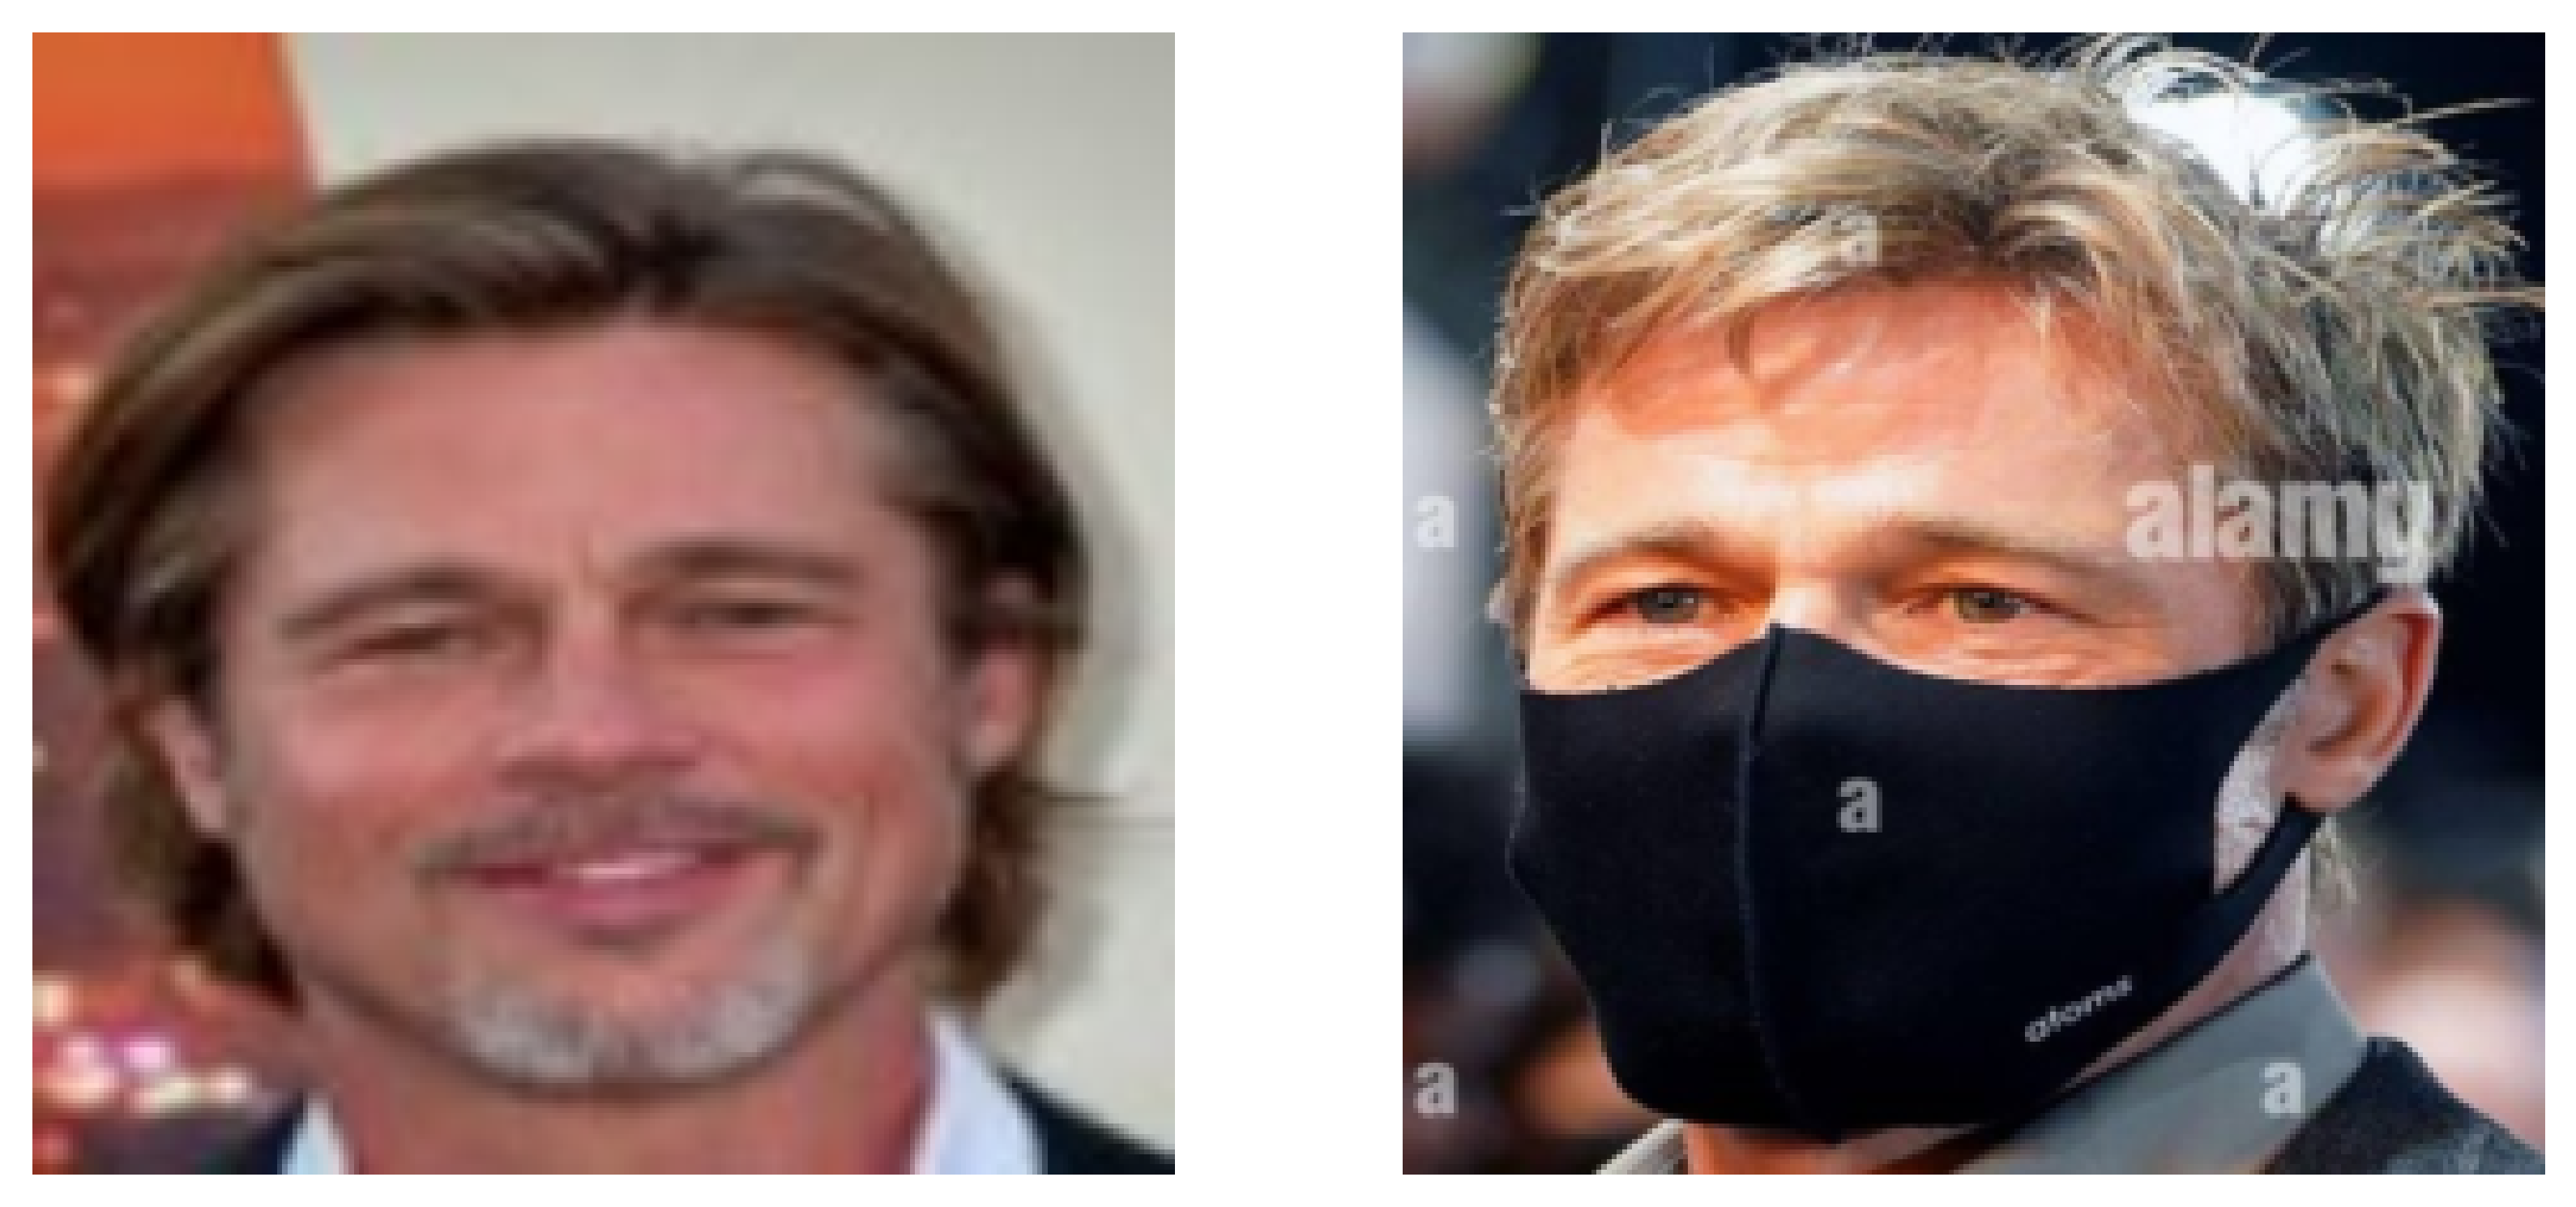

In [67]:
imshow(np.array(img1),np.array(img2),False)

In [70]:
getTopKSimilarConcepts1(conceptScores,30)

Nasal base: Wide 2.6226043701171875e-05
Brow ridges are Subtle 0.0034404993057250977
Face of a Male 0.006119132041931152
Piercing is Present 0.013897061347961426
No Dimple is present in the Left Cheek 0.021886825561523438
Laryngeal prominence (Adam's apple) is Prominent 0.031002044677734375
Frontal lines (forehead wrinkles) is Present 0.036722004413604736
Tattoo is Present 0.03723025321960449
Left Cheekbone is not prominent 0.03785252571105957
Skin marks is Present 0.04789096117019653
Nasal tip: Upturned 0.049885720014572144
Right Cheekbone is not prominent 0.051293253898620605
Makeup is Present 0.05982428789138794
Facial hair on neck, below chin/jawline is Present 0.07026088237762451
Forehead height: Long 0.07174602150917053
Nasal body: Straight 0.07228398323059082
Left and Right Eyes: Slighlty Asymmetrical 0.08449095487594604
No Dimple is present in the Right Cheek 0.10293900966644287
Face shape: Oblong 0.10912880301475525
Forehead width: Wide 0.11827355623245239
Face of a middle age

In [96]:
len(concepts)

106

In [71]:
for i in range(0,conceptScores.shape[1]):
    print(concepts[i],conceptScores[0][i].item(),conceptScores[1][i].item(),conceptScores[0][i].item()-conceptScores[1][i].item())

Face of a Young Person 0.4254763126373291 0.29273951053619385 0.13273680210113525
Face of a middle aged person 0.47991394996643066 0.5981884002685547 -0.11827445030212402
Face of a Old Person 0.09460977464914322 0.10907208919525146 -0.014462314546108246
Face of a Male 0.7254981994628906 0.7316173315048218 -0.006119132041931152
Face of a Female 0.274501770734787 0.2683826684951782 0.006119102239608765
Face color: Pale White 0.08742792904376984 0.10538189113140106 -0.017953962087631226
Face color: White 0.04081385210156441 0.07108511030673981 -0.0302712582051754
Face color: Olive 0.10578517615795135 0.08271125704050064 0.023073919117450714
Face color: Moderate Brown 0.21876321732997894 0.3161636292934418 -0.09740041196346283
Face color: Dark Brown 0.3765411972999573 0.12483132630586624 0.25170987099409103
Face color: Black 0.17066863179206848 0.29982686042785645 -0.12915822863578796
Face shape: Oval 0.23040540516376495 0.23188717663288116 -0.001481771469116211
Face shape: Round 0.0951746

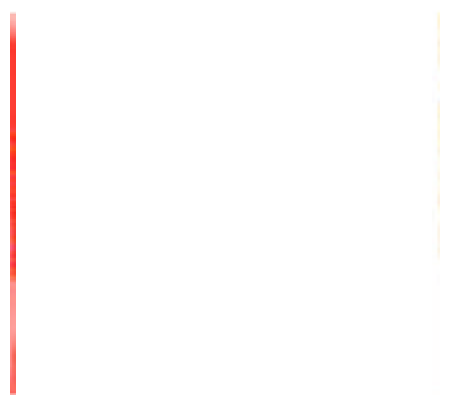

In [21]:
imshow(np.array(image1),np.array(image2))

In [29]:
print(getTopKSimilarConcepts(conceptScores,104))

Left eyebrow shape is Straight 0.3419795334339142 0.3454633951187134 0.0034838616847991943
Distance between eyes: Normal 0.3998991549015045 0.39571815729141235 0.004180997610092163
Scars is Absent 0.3516819179058075 0.34691500663757324 0.004766911268234253
Scars is Present 0.6483180522918701 0.6530849933624268 0.004766941070556641
Piercing is Present 0.7033198475837708 0.6979361176490784 0.005383729934692383
Piercing is Absent 0.29668012261390686 0.30206385254859924 0.005383729934692383
Left and Right Eyes: Significantly Asymmetrical 0.6103801131248474 0.6028785705566406 0.007501542568206787
Face shape: Round 0.037062108516693115 0.027766818180680275 0.00929529033601284
Left eyebrow shape is Curved 0.3659714162349701 0.3764725625514984 0.01050114631652832
Face color: White 0.15984851121902466 0.1723291128873825 0.012480601668357849
Face color: Pale White 0.14325982332229614 0.12990877032279968 0.01335105299949646
Left eyebrow shape is Arch 0.29204902052879333 0.2780640125274658 0.01398

In [46]:
len(indices)

35

In [48]:
labels = torch.load("/home/csgrad/byalavar/XAI/AdaFace/scripts/imageLabelsVal.pt").to("cpu")

In [54]:
a = list(labels.numpy())
a.count(2)

0

In [30]:
topIndices = torch.topk(conceptScores[0],k=104,largest=True).indices
topIndices2 = torch.topk(conceptScores[1],k=104,largest=True).indices

for i,j in zip(topIndices,topIndices2):
        print(concepts[i],conceptScores[0][i].item(),conceptScores[1][i].item) #,torch.sum(textFeatures[i],dim=0).item())

Tattoo is Present 0.8907273411750793 0.788947582244873
Piercing is Present 0.7033198475837708 0.6979361176490784
No Dimple is present in the Left Cheek 0.6989747881889343 0.6476311087608337
Face of a Male 0.6588583588600159 0.7165371775627136
Scars is Present 0.6483180522918701 0.6530849933624268
Nasal body: Straight 0.6465874910354614 0.560293436050415
Frontal lines (forehead wrinkles) is Present 0.6170726418495178 0.5024139881134033
Left and Right Eyes: Significantly Asymmetrical 0.6103801131248474 0.6028785705566406
Facial hair on neck, below chin/jawline is Present 0.6076180934906006 0.6391168236732483
Makeup is Present 0.6013764142990112 0.5489736199378967
Skin marks is Present 0.5912858843803406 0.6288183927536011
No Dimple is present in the Right Cheek 0.5762187838554382 0.6344619393348694
Laryngeal prominence (Adam's apple) is Subtle 0.546965479850769 0.44676080346107483
Brow ridges are Subtle 0.5457335710525513 0.37230971455574036
Hair Color: Black 0.5303922295570374 0.4027895

In [21]:
topIndices = torch.topk(conceptScores[0],k=30,largest=True).indices
topIndices2 = torch.topk(conceptScores[1],k=30,largest=True).indices
for i,j in zip(topIndices,topIndices2):
        print(concepts[i]," || ",concepts[j]) #,torch.sum(textFeatures[i],dim=0).item())

Facial hair on right side is Present  ||  Facial hair on right side is Present
Asymmetry between right and left eyebrows is Symmetrical  ||  Facial hair on left side is Present
Facial hair on left side is Present  ||  Asymmetry between right and left eyebrows is Symmetrical
Asymmetry between right and left eyebrows is Slightly Asymmetrical  ||  Neck (overall) is Average
Overall shape of face is Round  ||  Nasal tip: Upturned
Neck (overall) is Average  ||  Overall shape of face is Round
Overall shape of face is Square  ||  Facial hair on left side is Absent
Forehead hairline is Symmetrical  ||  Right upper eyelid (including lashes): Average
Overall shape of face is Oval  ||  Asymmetry between right and left eyebrows is Slightly Asymmetrical
Overall shape of face is Long  ||  Forehead hairline is Symmetrical
Asymmetry between right and left eyebrows is Highly Asymmetrical  ||  Overall shape of face is Oval
Facial hair on left side is Absent  ||  Facial hair on right side is Absent
Asymme

In [42]:
a = torch.rand(227,1,768)
b = torch.rand(512,768)

c = torch.nn.CosineSimilarity(dim=-1)
d = c(a,b)
print(d.shape)


torch.Size([227, 512])


In [47]:
check1 = torch.nn.functional.cosine_similarity(a[1].squeeze_(),b[1],dim=0)


In [49]:
d = d.T
#d[1]

In [51]:
d[1]

tensor([0.7590, 0.7482, 0.7550, 0.7696, 0.7731, 0.7523, 0.7558, 0.7604, 0.7515,
        0.7609, 0.7476, 0.7493, 0.7551, 0.7540, 0.7564, 0.7521, 0.7695, 0.7386,
        0.7341, 0.7609, 0.7547, 0.7523, 0.7560, 0.7633, 0.7549, 0.7459, 0.7698,
        0.7413, 0.7397, 0.7580, 0.7646, 0.7519, 0.7489, 0.7536, 0.7527, 0.7491,
        0.7617, 0.7551, 0.7729, 0.7329, 0.7437, 0.7466, 0.7709, 0.7485, 0.7609,
        0.7684, 0.7572, 0.7359, 0.7408, 0.7527, 0.7570, 0.7566, 0.7509, 0.7520,
        0.7619, 0.7580, 0.7620, 0.7354, 0.7639, 0.7509, 0.7730, 0.7467, 0.7420,
        0.7463, 0.7424, 0.7465, 0.7593, 0.7434, 0.7450, 0.7490, 0.7543, 0.7560,
        0.7468, 0.7512, 0.7600, 0.7602, 0.7452, 0.7609, 0.7672, 0.7526, 0.7402,
        0.7574, 0.7280, 0.7576, 0.7471, 0.7582, 0.7495, 0.7396, 0.7603, 0.7609,
        0.7717, 0.7222, 0.7381, 0.7540, 0.7429, 0.7567, 0.7485, 0.7546, 0.7611,
        0.7456, 0.7486, 0.7606, 0.7510, 0.7638, 0.7466, 0.7633, 0.7352, 0.7592,
        0.7515, 0.7404, 0.7514, 0.7496, 

In [50]:
check1

tensor(0.7482)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [20]:
print(torch.sum(a,1))

tensor([3.3717, 2.9475, 1.9530, 2.8458])


In [21]:
b = torch.norm(a,2,1,keepdim=True)
c = torch.div(a,b)
print(c)
print(torch.sum(c,1))

tensor([[0.5443, 0.5130, 0.3952, 0.4162, 0.3334],
        [0.2517, 0.5714, 0.6511, 0.1581, 0.4016],
        [0.0036, 0.7183, 0.4377, 0.4797, 0.2496],
        [0.5277, 0.1487, 0.6320, 0.0625, 0.5441]])
tensor([2.2021, 2.0338, 1.8890, 1.9150])


In [93]:
topIndices = torch.topk(conceptScores[0],k=30,largest=True).indices
for i in topIndices:
        print(concepts[i],conceptScores[0][i].item())

Nasal tip: Pointed 11.952689170837402
Nasal tip: Rounded 8.171642303466797
Brow ridges are Prominent 6.271557807922363
Hair is Thick 5.069166660308838
Brow ridges are Subtle 5.0533294677734375
Nasal base: Narrow 4.94657039642334
Intercanthal distance: Close 4.868131160736084
Forehead shape is Narrow 4.816830635070801
Hair is Straight 4.728919506072998
Left cheekbone is Subtle 4.543979644775391
Nasal tip: Downturned 4.456479549407959
Forehead shape is Low 4.431840896606445
Nasal base: Wide 3.964298725128174
Forehead shape is High 3.8815741539001465
Right eye sclera: Red 3.7982568740844727
Jawline (from chin to gonial angle) is Straight 3.7981135845184326
Nasal body: Straight 3.700982093811035
Makeup is Present 3.5580410957336426
Forehead hairline is Symmetrical 3.5327439308166504
Overall skin appearance is Olive 3.5122742652893066
Jawline (from chin to gonial angle) is Angular 3.3573102951049805
Left eye sclera: Red 3.2502171993255615
Gnathism (apparent convexity or concavity of the mou

In [73]:
print(getTopKSimilarConcepts(conceptScores,20))

Proportions/position of features on face: Equal 0.006417036056518555
Upper lip: Normal 0.03285861015319824
Overall shape of face is Round 0.03335857391357422
Upper lip: Thick 0.053849756717681885
Lower lip: Thick 0.08866500854492188
Right eyebrow shape is Straight 0.0966789722442627
Overall mouth: Large 0.10927104949951172
Neck (overall) is Thick 0.11118412017822266
Ear abnormalities: Present 0.11215686798095703
Forehead shape is Narrow 0.13043558597564697
Philtrum: Normal 0.13300418853759766
Proportions/position of features on face: Slightly Backward 0.14770805835723877
Chin (profile and frontal view) is Pointed 0.18333661556243896
Hair is Grey 0.18415558338165283
Overall left ear: Normal 0.2008296251296997
Shape of cranial vault is Square 0.20861577987670898
Overall shape of face is Oval 0.21446752548217773
Scars is Absent 0.2247101068496704
Asymmetry between right and left eyebrows is Slightly Asymmetrical 0.22713732719421387
Gonial angle (angle of the jaw) is Blunt 0.24947047233581

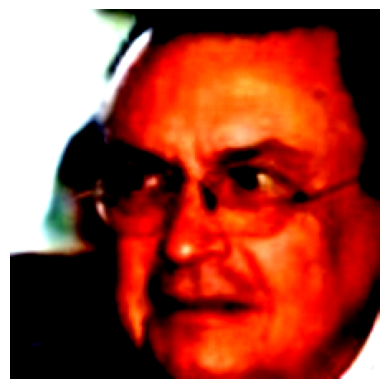

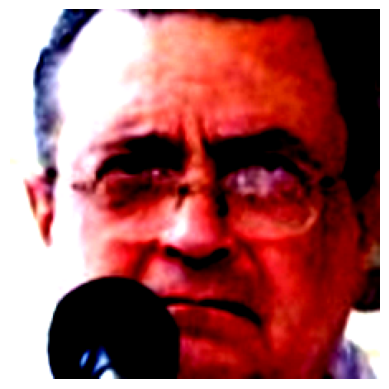